<a href="https://colab.research.google.com/github/jhomolos/data_projects/blob/main/Desafio_5_Escola_DNC_Prepara%C3%A7%C3%A3o_de_Dados_em_E_commerce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Preparação de Dados em um E-commerce**

Uma empresa do ramo de e-commerce contratou você para levantar os
indicadores de recência, frequência e ticket médio (RFM) dos seus clientes.

Segue a definição de RFM, por cada uma de suas letras:

**R (Recency):** Tempo que o cliente realizou a última compra (em dias)

**F (Frequency):** Quantidade de compras realizadas pelo cliente

**M (Monetary):** Valor do ticket médio gasto pelo cliente, onde ticket médio = média do total gasto por pedido para cada cliente

Para isso,será utilizada uma base de dados, e com ela, será construído
um código em Python que gera um output também csv, porém contendo apenas a
identificação do cliente e métricas RFM.

# **Sobre os dados**

A tabela contém informações de compras de um e-commerce em 37 países e também a  identificação do cliente e os dados da compra. Seguem as colunas do dataset:




**CustomerID:**          Código de identificação do cliente

**Description:**        Descrição do produto

**InvoiceNo:**           Código da fatura

**StockCode:**           Código de estoque do produto

**Quantity:**            Quantidade do produto

**InvoiceDate:**         Data do faturamento (compra)

**UnitPrice:**           Preço unitário do produto

**Country:**             País da compra


In [ ]:
#Instalando o Pandas Profiling para exibição posterior do ProfileReport
!pip install pandas-profiling==3.3.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.0/268.0 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.8/309.8 kB 20.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.7/33.7 MB 28.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 35.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 54.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 41.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 28.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 26.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 28.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 4.3 MB

In [ ]:
#import libraries

import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport

import matplotlib.pyplot as plt

from sklearn.preprocessing import scale

/usr/local/lib/python3.10/dist-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/usr/local/lib/python3.10/dist-packages/visions/backends/shared/nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def hasna(x: np.ndarray) -> bool:


### **ETAPA 1 - Ler o arquivo e inspecionar dados**

In [ ]:
from google.colab import files
upload = files.upload()

Saving Data.csv to Data.csv


Importando o dataframe

In [ ]:
df = pd.read_csv('Data.csv')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 08:26,3.39,17850.0,United Kingdom


Criando um Profile Report do dataframe

In [ ]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Verifica quantidade de valores não nulos e o tipo das features

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


### **ETAPA 02 - Valores faltantes na identificação do cliente**

Verificando a quantidade de nulos por coluna.

In [ ]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Deletando nulos da coluna 'CostumerID'

In [ ]:
df_clear = df.dropna(subset = ['CustomerID'])

Verificando se ainda existem valores nulos no dataframe

In [ ]:
df_clear.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

### **ETAPA 03 - Preços unitários e quantidade de produtos iguais ou inferior a 0**

Filtro para verificar se há preços unitários nulos ou menores do que zero

In [ ]:
df_clear[df_clear['UnitPrice']<=0].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,12/5/2010 14:02,0.0,12647.0,Germany
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,12/16/2010 14:36,0.0,16560.0,United Kingdom
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10,12/21/2010 13:45,0.0,14911.0,EIRE
47068,540372,22090,PAPER BUNTING RETROSPOT,24,1/6/2011 16:41,0.0,13081.0,United Kingdom
47070,540372,22553,PLASTERS IN TIN SKULLS,24,1/6/2011 16:41,0.0,13081.0,United Kingdom


Filtro para verificar se há quantidades nulas ou menores do que zero

In [ ]:
df_clear[df_clear['Quantity']<=0].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 09:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 09:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom


Filtro para quantidades e preços maiores que zero

In [ ]:
df_clear = df_clear.query('Quantity>0 & UnitPrice>0')
df_clear.describe()

,Quantity,UnitPrice,CustomerID
count,397884.000000,397884.000000,397884.000000
mean,12.988238,3.116498,15294.423453
std,179.331775,22.097875,1713.141560
min,1.000000,0.040000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


### **Etapa 04 - Verificar se existem linhas duplicadas**

Verificando a existência de linhas duplicadas

In [ ]:
df_clear.duplicated().sum().any()

True

Como retornou true, vamos exclui-las

In [ ]:
df_clear = df_clear.drop_duplicates()

Vamos testar se ainda existem valores duplicados

In [ ]:
df_clear.duplicated().sum().any()

False

Portanto, não há mais valores duplicados

### **Etapa 05 - Tipos de dados da coluna**

In [ ]:
df_clear.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392692 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    392692 non-null  object 
 1   StockCode    392692 non-null  object 
 2   Description  392692 non-null  object 
 3   Quantity     392692 non-null  int64  
 4   InvoiceDate  392692 non-null  object 
 5   UnitPrice    392692 non-null  float64
 6   CustomerID   392692 non-null  float64
 7   Country      392692 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.0+ MB


Mudando o tipo da variável CustomerID para int

In [ ]:
df_clear['CustomerID'] = df_clear['CustomerID'].astype(int)

Mudando o tipo da variável InvoiceDate para Datetime

In [ ]:
df_clear['InvoiceDate'] = pd.to_datetime(df_clear['InvoiceDate'])

In [ ]:
df_clear.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392692 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392692 non-null  object        
 1   StockCode    392692 non-null  object        
 2   Description  392692 non-null  object        
 3   Quantity     392692 non-null  int64         
 4   InvoiceDate  392692 non-null  datetime64[ns]
 5   UnitPrice    392692 non-null  float64       
 6   CustomerID   392692 non-null  int64         
 7   Country      392692 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 27.0+ MB


### **Etapa 06 - Tratar os outliers**

Analisa as variáveis numéricas, para verificação de estatística básica e presença outliers

In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611121,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


Plotando os dados no Boxplot para verificar a distribuição dos outliers

<AxesSubplot:>

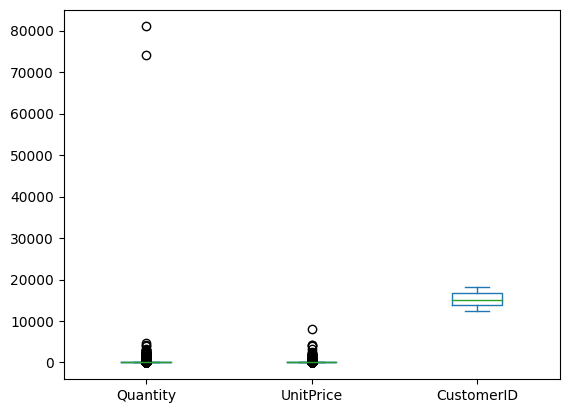

In [ ]:
df_clear.plot.box()


Verificamos a presença de outliers nas features 'Quantity' e 'UnitPrice', o que torna difícil a sua visualização. Então é preciso tratar a diferença de escalas.

<AxesSubplot:>

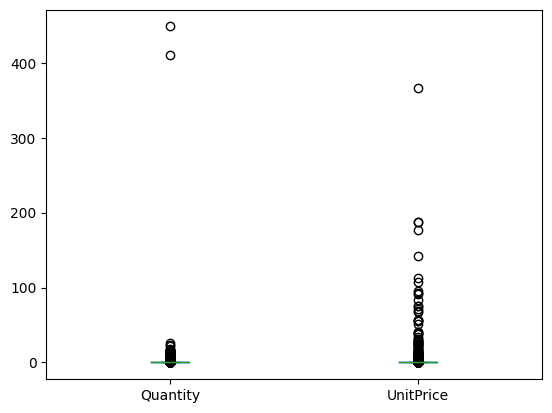

In [ ]:
df_clear[['Quantity', 'UnitPrice']].apply(scale).plot.box()

Analisando a distribuição de dados entre os percentis

In [ ]:
df_clear.describe(percentiles=[.25,.50,.65,.75,.99])

,Quantity,UnitPrice,CustomerID
count,392692.000000,392692.000000,392692.000000
mean,13.119702,3.125924,15287.843865
std,180.492832,22.241834,1713.539549
min,1.000000,0.040000,12346.000000
25%,2.000000,1.250000,13955.000000
50%,6.000000,1.950000,15150.000000
65%,10.000000,2.550000,16134.000000
75%,12.000000,3.750000,16791.000000
99%,120.000000,14.950000,18211.000000
max,80995.000000,8142.750000,18287.000000


O guia do desafio orienta então a eliminarmos os outliers extremos em que a quantidade de item na compra é superior a 10.000 e que o preço unitário é inferior a 5.000. Para isso, utilizaremos apenas filtros, dada a discrepância evidente observada entre o 99% e max.

In [ ]:
df_no_outliers = df_clear.query('Quantity<=10000 & UnitPrice<=5000')
df_no_outliers.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


### **Etapa 07 - Criar uma coluna adicional**

Passamos agora a fazer o *Enrichment* do nosso dataset, para calcular o valor total da venda, isto é, Quantity * UnitPrice

In [ ]:
df_no_outliers['TotalValue'] = df_no_outliers['Quantity'] * df_no_outliers['UnitPrice']
df_no_outliers.head()

<ipython-input-72-3052fb03e471>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['TotalValue'] = df_no_outliers['Quantity'] * df_no_outliers['UnitPrice']


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalValue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


### **Etapa 08 - Última data**

Data da última compra

In [ ]:
lastPurchase = df_no_outliers['InvoiceDate'].max()
lastPurchase

Timestamp('2011-12-09 12:50:00')

### **Etapa 09 - Plotar gráficos**

Top 10 países com maior volume de vendas

<AxesSubplot:xlabel='Country'>

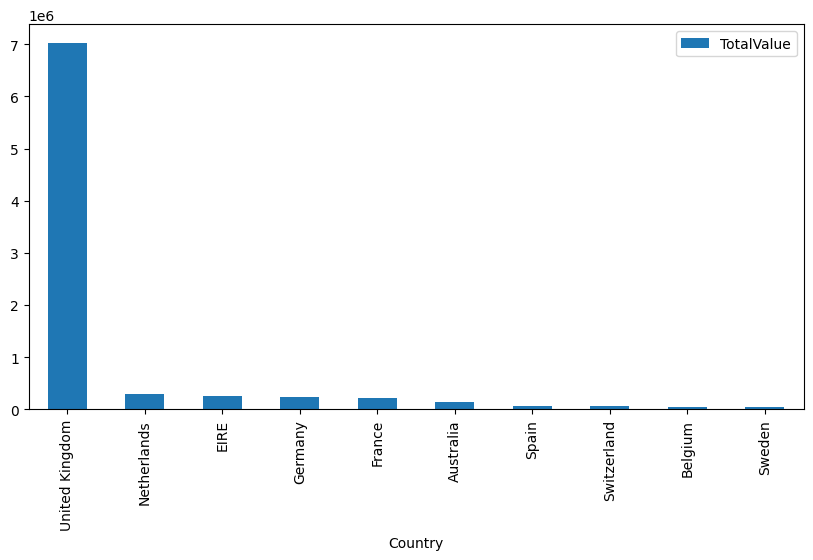

In [ ]:
df_no_outliers.groupby('Country')['TotalValue'].agg('sum').sort_values(ascending=False).head(10).reset_index().plot.bar(x='Country', y='TotalValue', figsize=(10,5))

Top 10 produtos mais vendidos

<AxesSubplot:xlabel='Description'>

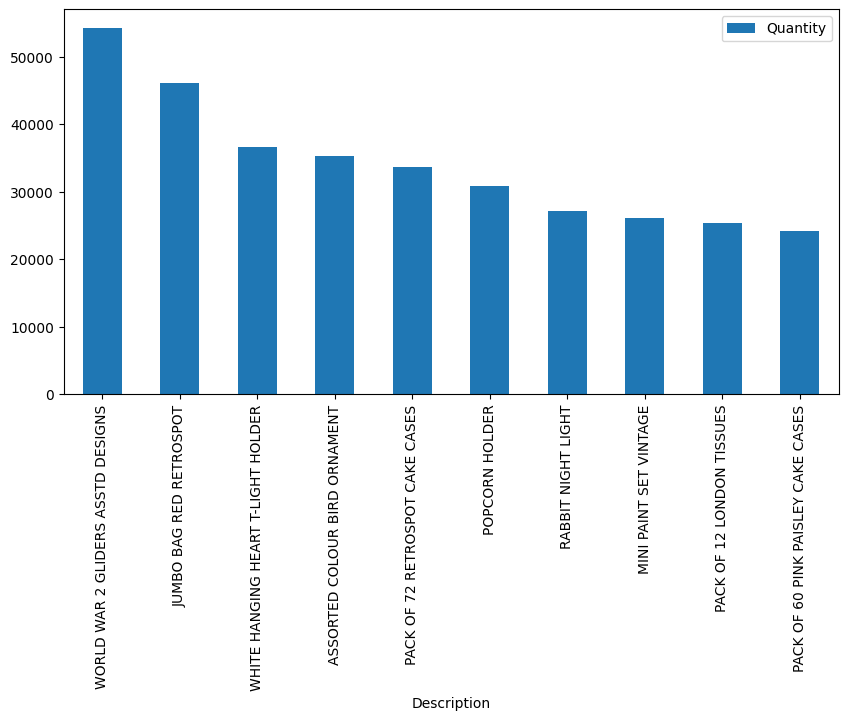

In [ ]:
df_no_outliers.groupby('Description')['Quantity'].agg('sum').sort_values(ascending=False).head(10).reset_index().plot.bar(x='Description', y='Quantity', figsize=(10,5))

Valor de venda total por mês

<ipython-input-76-18a04b045424>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['Year'] = df_no_outliers['InvoiceDate'].dt.year
<ipython-input-76-18a04b045424>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['Month'] = df_no_outliers['InvoiceDate'].dt.month
<ipython-input-76-18a04b045424>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

<AxesSubplot:title={'center':'Valor de venda total por mês'}, xlabel='YearMonth'>

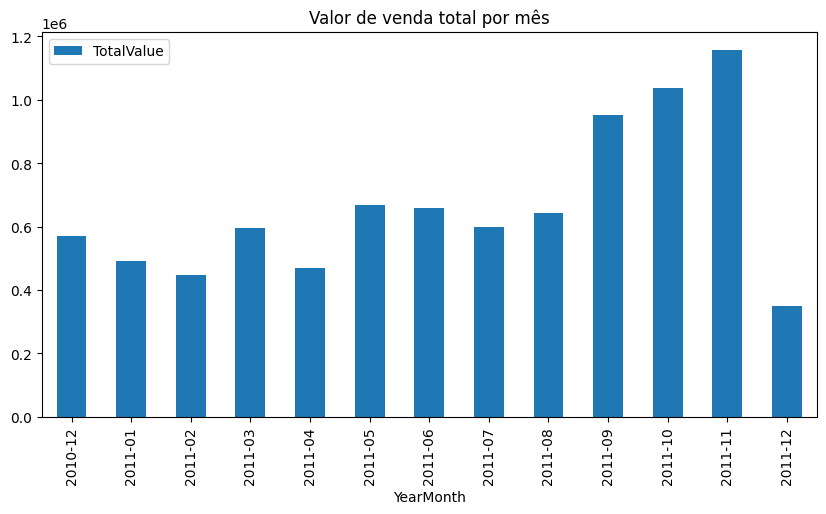

In [ ]:
df_no_outliers['Year'] = df_no_outliers['InvoiceDate'].dt.year
df_no_outliers['Month'] = df_no_outliers['InvoiceDate'].dt.month
df_no_outliers['YearMonth'] = df_no_outliers['Year'].map(str) + '-' + df_no_outliers['Month'].map(str)
df_no_outliers['YearMonth'] = pd.to_datetime(df_no_outliers['YearMonth'], format='%Y-%m').dt.strftime('%Y-%m')
df_no_outliers.groupby(['YearMonth'])[['TotalValue']].agg('sum').sort_values(by=['YearMonth']).reset_index().plot.bar(x='YearMonth', y='TotalValue', figsize=(10,5), title='Valor de venda total por mês')

Top 10 venda total por mês e por país

In [ ]:
df_plot4 = df_no_outliers.groupby(['YearMonth','Country'])['TotalValue'].agg('sum').sort_values(ascending=False).head(10).reset_index()
df_plot4.head(10)

,YearMonth,Country,TotalValue
0,2011-11,United Kingdom,975251.39
1,2011-10,United Kingdom,821220.13
2,2011-09,United Kingdom,794808.69
3,2011-05,United Kingdom,542216.60
4,2011-06,United Kingdom,523775.59
5,2011-08,United Kingdom,497194.91
6,2010-12,United Kingdom,496477.34
7,2011-07,United Kingdom,484546.59
8,2011-03,United Kingdom,465784.19
9,2011-04,United Kingdom,408734.11


<AxesSubplot:xlabel='YearMonth'>

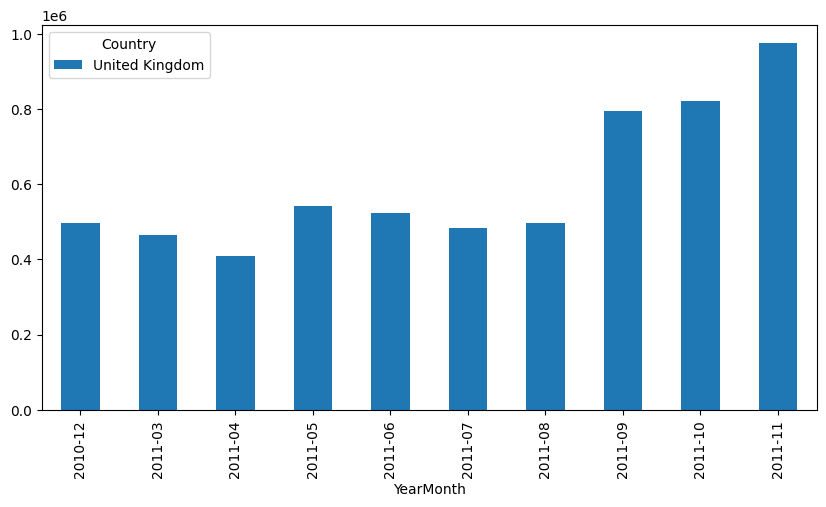

In [ ]:
df_plot4.pivot(index='YearMonth', columns='Country', values='TotalValue').plot.bar(figsize=(10,5))

### **Etapa 10 - Cálculo do RFM**

Aqui os dados serão agrupados por cliente e pedido/compra (InvoiceNo). Em seguida, serão obtidos a data e o preço total do pedido. Com isso, os dados serão agrupados apenas por cliente, e em seguida, será calculado o RFM, onde:

**R** é a recência, diferença em dias da última compra do cliente e da
última compra disponível no conjunto de dados, que calcularam
previamente.

**F** é a frequência, ou seja, a quantidade de compras feitas pelo
cliente;

**M** é o ticket médio, ou seja, a média das compras feitas pelo cliente.

In [ ]:
df_no_outliers.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalValue,Year,Month,YearMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010,12,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010,12,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,2010-12


Agrupando os dados por cliente (CostumerID) e por pedido (InvoiceNo), obtendo a data e o valor total do pedido.

In [ ]:
df_grouped = df_no_outliers.groupby(['CustomerID','InvoiceNo'])[['InvoiceDate','TotalValue']].agg({'InvoiceDate':'max','TotalValue':'sum'}).reset_index()
df_grouped.head()

,CustomerID,InvoiceNo,InvoiceDate,TotalValue
0,12347,537626,2010-12-07 14:57:00,711.79
1,12347,542237,2011-01-26 14:30:00,475.39
2,12347,549222,2011-04-07 10:43:00,636.25
3,12347,556201,2011-06-09 13:01:00,382.52
4,12347,562032,2011-08-02 08:48:00,584.91


Calculando a Recência (R)


In [ ]:
df_grouped['Recency'] = (lastPurchase - df_grouped['InvoiceDate']).dt.days
df_grouped.head()

,CustomerID,InvoiceNo,InvoiceDate,TotalValue,Recency
0,12347,537626,2010-12-07 14:57:00,711.79,366
1,12347,542237,2011-01-26 14:30:00,475.39,316
2,12347,549222,2011-04-07 10:43:00,636.25,246
3,12347,556201,2011-06-09 13:01:00,382.52,182
4,12347,562032,2011-08-02 08:48:00,584.91,129


Para pegar a última data de compra, usamos a função min() do pandas para pegar a menor recência

In [ ]:
recency = df_grouped.groupby('CustomerID')['Recency'].min().reset_index()
recency.columns = ['CustomerID','Recency']
recency.head()

,CustomerID,Recency
0,12347,1
1,12348,74
2,12349,18
3,12350,309
4,12352,35


Calculando a Frequência (F)

In [ ]:
frequency = df_grouped.groupby('CustomerID')['InvoiceNo'].count().reset_index()
frequency.columns = ['CustomerID','Frequency']
frequency.head()

,CustomerID,Frequency
0,12347,7
1,12348,4
2,12349,1
3,12350,1
4,12352,8


Calculando o ticket médio

In [ ]:
averageTicket = df_grouped.groupby('CustomerID')['TotalValue'].agg('mean').reset_index()
averageTicket.columns = ['CustomerID','AverageTicket']
averageTicket.head()

,CustomerID,AverageTicket
0,12347,615.714286
1,12348,449.310000
2,12349,1757.550000
3,12350,334.400000
4,12352,313.255000


Agrupando por cliente e calculando o RFM usando a função merge (left join)



In [ ]:
df_RFM = frequency.merge(recency, on='CustomerID')
df_RFM = df_RFM.merge(averageTicket, on='CustomerID')
df_RFM.head()

,CustomerID,Frequency,Recency,AverageTicket
0,12347,7,1,615.714286
1,12348,4,74,449.310000
2,12349,1,18,1757.550000
3,12350,1,309,334.400000
4,12352,8,35,313.255000
